# LOGISTIC REGRESSION -

### 1. Data Exploration

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

### 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

b. Encode categorical variables.


### 3. Model Building:


a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data


### 4. Model Evaluation:


a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Visualize the ROC curve.

### 5. Interpretation:



a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the dataset
print(data.head())

# Display information about the features and their types
print(data.info())

# Summary statistics
print(data.describe())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

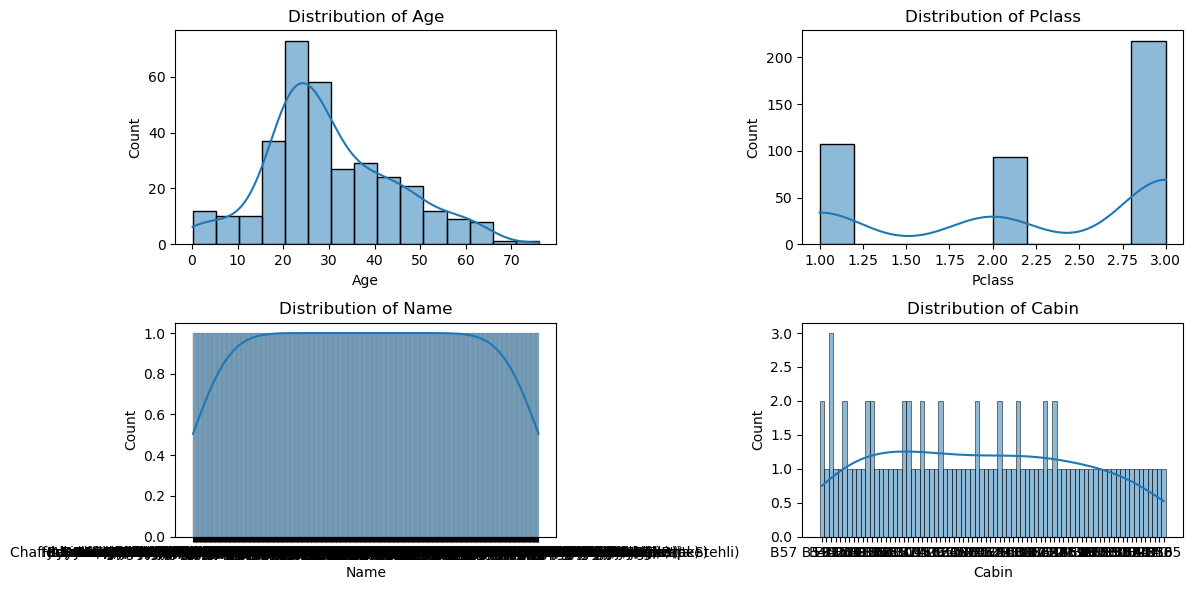

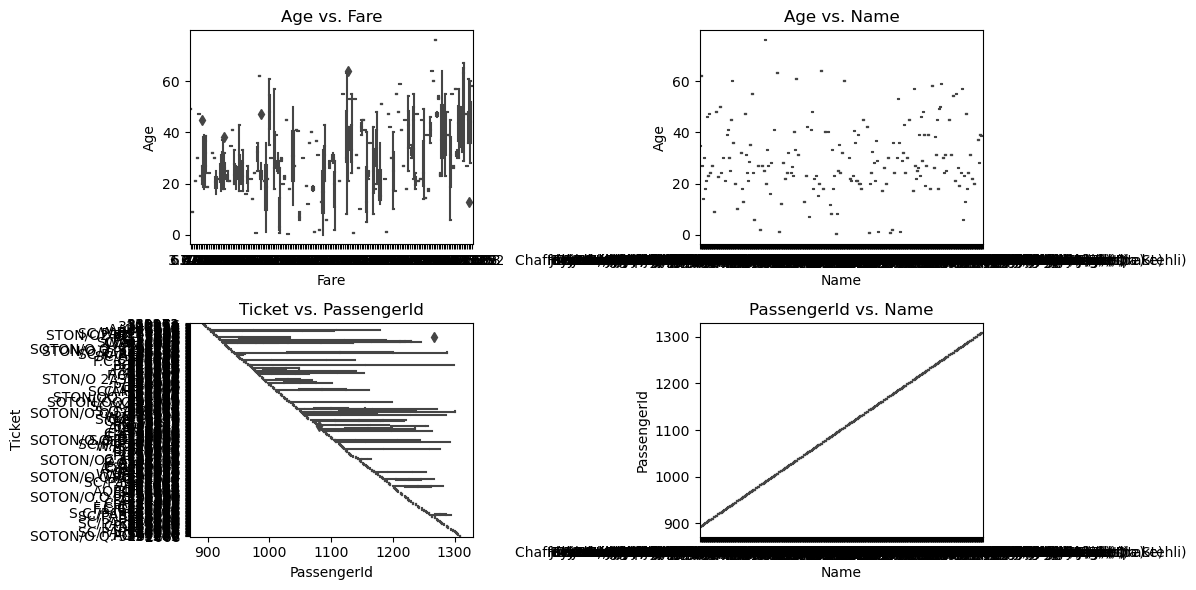

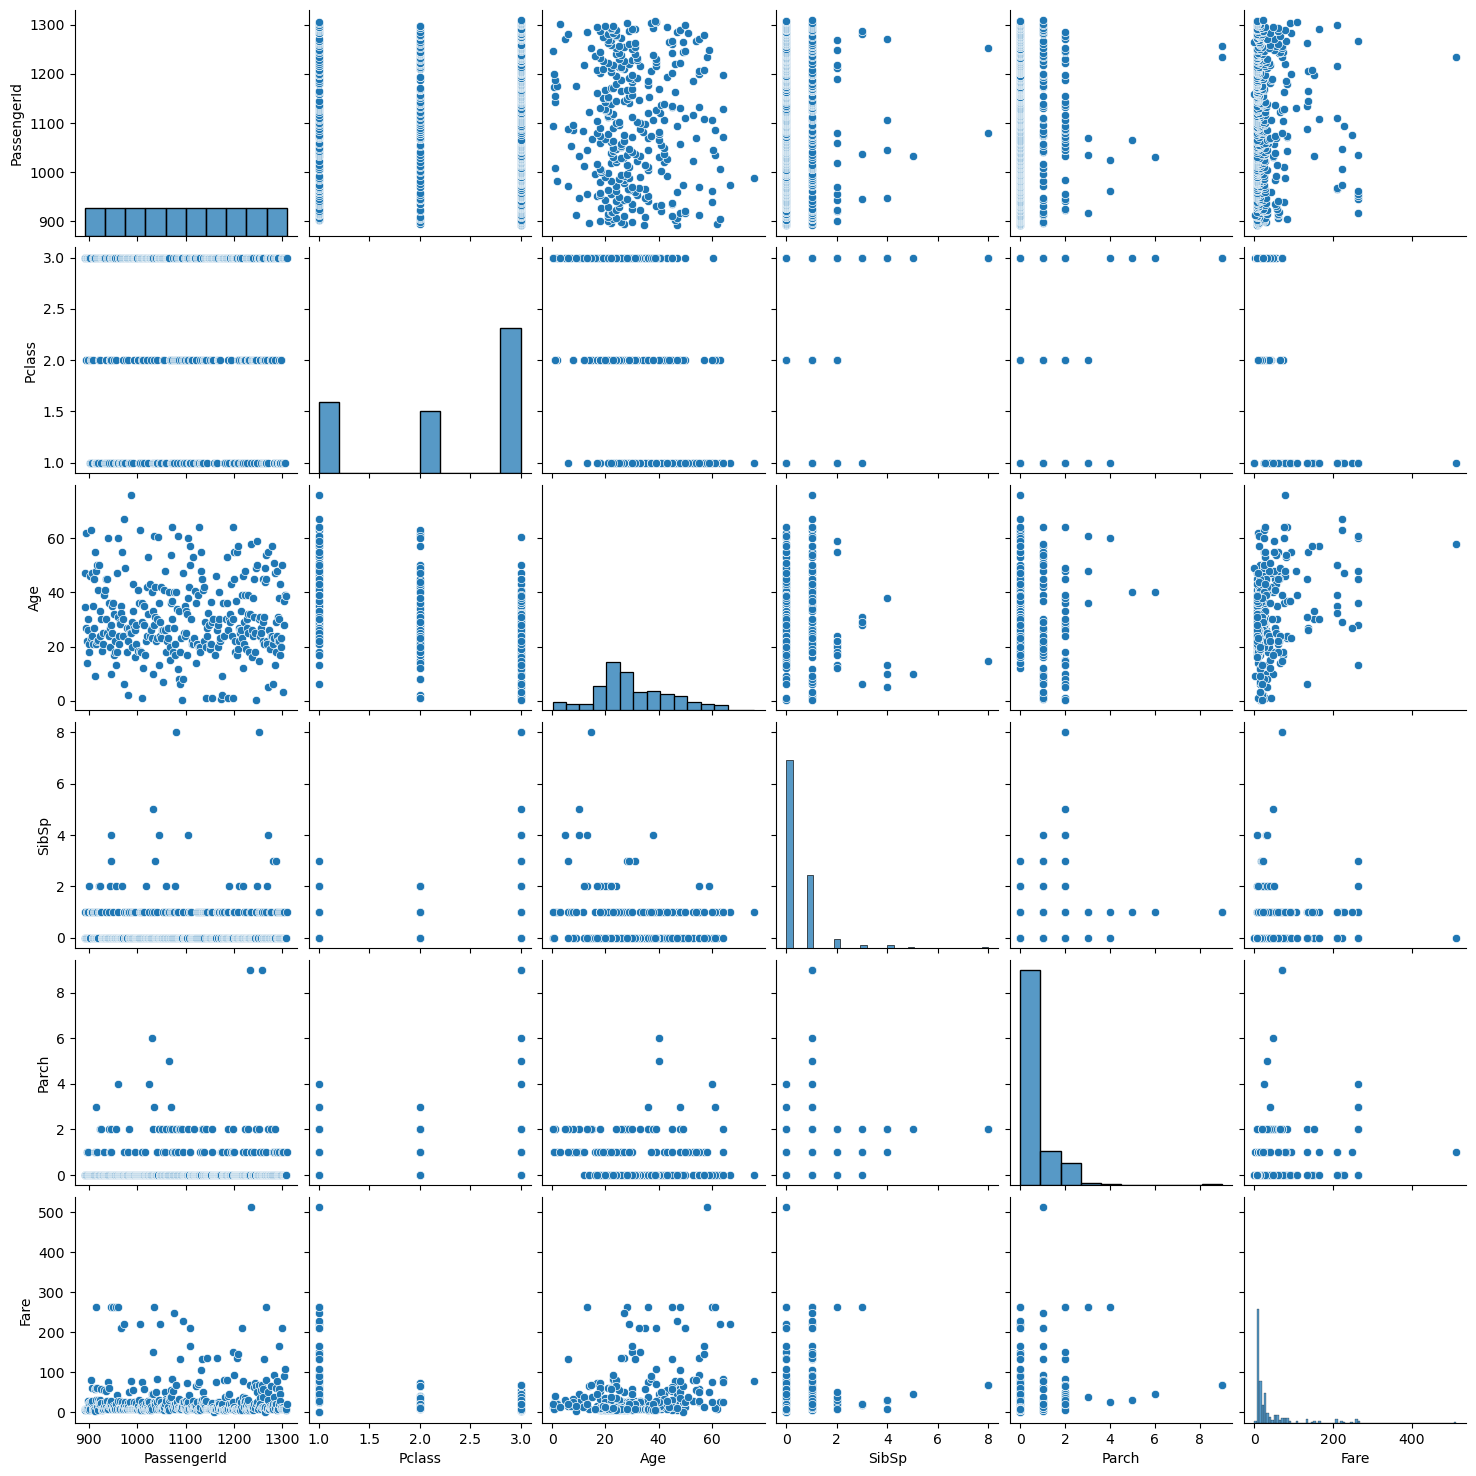

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(data['Pclass'], kde=True)
plt.title('Distribution of Pclass')

plt.subplot(2, 2, 3)
sns.histplot(data['Name'], kde=True)
plt.title('Distribution of Name')

plt.subplot(2, 2, 4)
sns.histplot(data['Cabin'], kde=True)
plt.title('Distribution of Cabin')

plt.tight_layout()
plt.show()

# Box plots of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=data['Fare'], y=data['Age'])
plt.title('Age vs. Fare')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['Name'], y=data['Age'])
plt.title('Age vs. Name')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['PassengerId'], y=data['Ticket'])
plt.title('Ticket vs. PassengerId')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['Name'], y=data['PassengerId'])
plt.title('PassengerId vs. Name')

plt.tight_layout()
plt.show()

# Pair plot of numerical features
sns.pairplot(data)
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_20876\3946232773.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


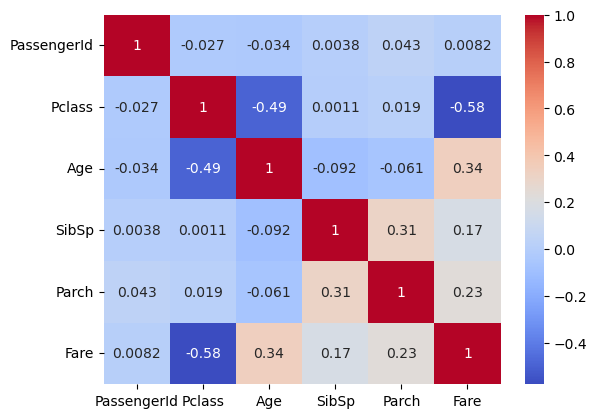

In [4]:

# Visualize the correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('Titanic_test.csv')

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
data['Age'] = imputer.fit_transform(data[['Age']])

# Encode categorical variables
encoder = OneHotEncoder(drop='first')  # Drop first to avoid multicollinearity
encoded_features = pd.DataFrame(encoder.fit_transform(data[['PassengerId', 'Name']]))
data = pd.concat([data, encoded_features], axis=1)
data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# Display the first few rows of the modified dataset
print(data.head())


   Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  \
0       3    male  34.5      0      0   330911   7.8292   NaN        Q   
1       3  female  47.0      1      0   363272   7.0000   NaN        S   
2       2    male  62.0      0      0   240276   9.6875   NaN        Q   
3       3    male  27.0      0      0   315154   8.6625   NaN        S   
4       3  female  22.0      1      1  3101298  12.2875   NaN        S   

                                0  
0                   (0, 622)\t1.0  
1    (0, 0)\t1.0\n  (0, 819)\t1.0  
2    (0, 1)\t1.0\n  (0, 685)\t1.0  
3    (0, 2)\t1.0\n  (0, 824)\t1.0  
4    (0, 3)\t1.0\n  (0, 594)\t1.0  


In [8]:
# Define the feature matrix X and the target vector y
X = data.drop(columns=['Pclass'])
y = data['Pclass']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [9]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [10]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


### 5. Interpretation:



a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).


#### Solution :


Interpreting the coefficients of a logistic regression model can provide insights into the significance of features in predicting the target variable (survival probability in this case).


a. Interpretation of Coefficients:


For numeric features: A positive coefficient suggests that as the feature increases, the log-odds of the target variable (survival) also increase. Conversely, a negative coefficient suggests that as the feature increases, the log-odds of survival decrease.
For categorical features encoded using one-hot encoding: Each coefficient corresponds to a specific category. A positive coefficient indicates that the presence of that category increases the log-odds of survival compared to the reference category, while a negative coefficient indicates a decrease in the log-odds.


b. Significance of Features:


The significance of a feature can be determined by its coefficient value and statistical significance (p-value). A large coefficient magnitude indicates a stronger impact on the prediction, while a small p-value (typically <0.05) indicates that the coefficient is significantly different from zero.
Features with large coefficients and low p-values are considered more important in predicting survival probability.


Example interpretation:


If the coefficient for the 'Age' feature is -0.05, it would suggest that for each year increase in age, the log-odds of survival decrease by 0.05, holding other variables constant.

If the coefficient for the 'Sex_male' feature is -2.0, it would suggest that being male decreases the log-odds of survival by 2.0 compared to being female, holding other variables constant.